In [631]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [632]:
train_df = pd.read_csv("/Users/yoshimasa/Downloads/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/Users/yoshimasa/Downloads/house-prices-advanced-regression-techniques/test.csv")

In [633]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [634]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [635]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


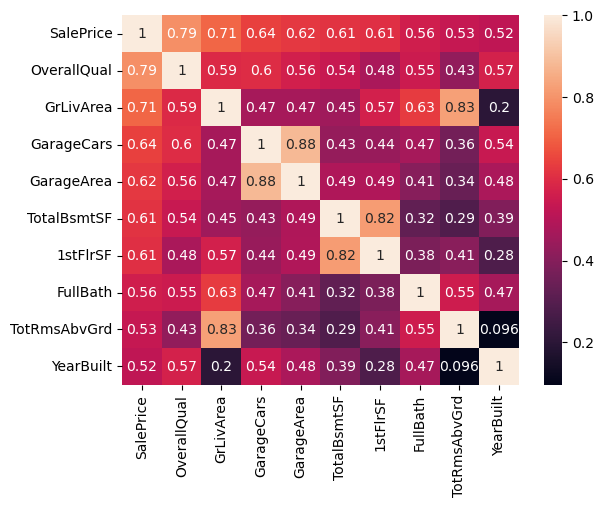

In [637]:
import seaborn as sns
cor = train_df.corr()
k = 10
cols = cor.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
hm = sns.heatmap(cm,cbar=True,annot=True,xticklabels=cols.values,yticklabels=cols.values)
plt.show()

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

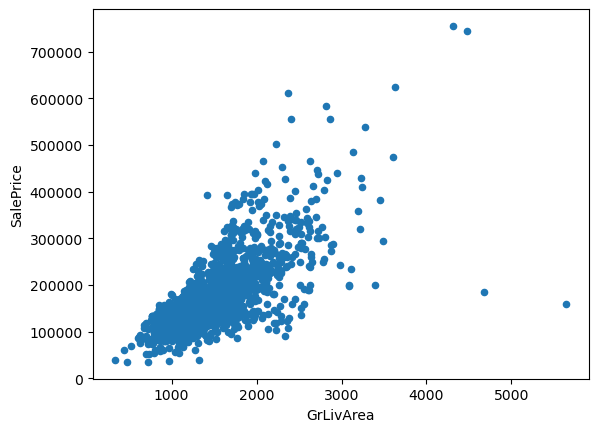

In [638]:
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'],train_df[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice')

In [639]:
train_df.sort_values(by='GrLivArea',ascending=False)[:2]
train_df = train_df.drop(train_df[train_df['Id']==1299].index)
train_df = train_df.drop(train_df[train_df['Id']==524].index)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

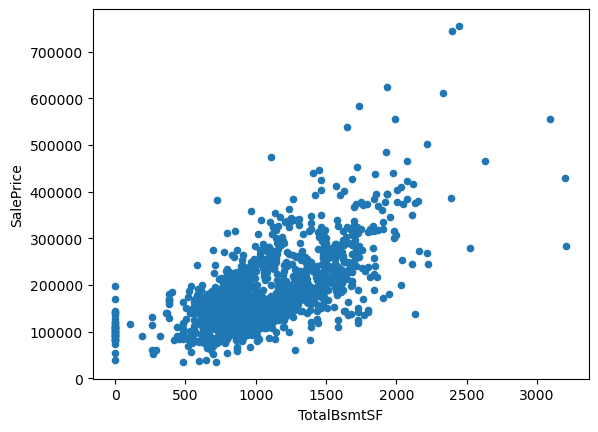

In [642]:
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'],train_df[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice')

In [643]:
all_df = pd.concat((train_df, test_df)).reset_index(drop=True)
all_df_na = all_df.isnull().sum()/len(all_df)
all_df_na_Tot = all_df.isnull().sum()
all_df_na = all_df_na.drop(all_df_na[all_df_na==0].index).sort_values(ascending=False)
all_df_na_Tot = all_df_na_Tot.drop(all_df_na_Tot[all_df_na_Tot==0].index).sort_values(ascending=False)
MissingData = pd.DataFrame({'Missing': all_df_na})
MissingData = pd.concat((MissingData,pd.DataFrame({'Total':all_df_na_Tot})),axis=1)
MissingData

,Missing,Total
PoolQC,0.996915,2908
MiscFeature,0.964004,2812
Alley,0.932122,2719
Fence,0.804251,2346
SalePrice,0.500171,1459
FireplaceQu,0.486802,1420
LotFrontage,0.166610,486
GarageCond,0.054508,159
GarageYrBlt,0.054508,159
GarageFinish,0.054508,159


In [644]:
dropCol = MissingData[MissingData['Missing']>0.1].index
dropCol

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'SalePrice', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [645]:
for col in dropCol:
    all_df = all_df.drop([col],axis=1)

In [646]:
all_df_na = all_df.isnull().sum()/len(all_df)
all_df_na_Tot = all_df.isnull().sum()
all_df_na = all_df_na.drop(all_df_na[all_df_na==0].index).sort_values(ascending=False)
all_df_na_Tot = all_df_na_Tot.drop(all_df_na_Tot[all_df_na_Tot==0].index).sort_values(ascending=False)
MissingData = pd.DataFrame({'Missing': all_df_na})
MissingData = pd.concat((MissingData,pd.DataFrame({'Total':all_df_na_Tot})),axis=1)
MissingData

,Missing,Total
GarageCond,0.054508,159
GarageQual,0.054508,159
GarageYrBlt,0.054508,159
GarageFinish,0.054508,159
GarageType,0.053822,157
BsmtCond,0.028111,82
BsmtExposure,0.028111,82
BsmtQual,0.027768,81
BsmtFinType2,0.027425,80
BsmtFinType1,0.027083,79


In [647]:
for col in ('GarageCond','GarageFinish','GarageQual','GarageType','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2','Exterior2nd'):
    all_df[col] = all_df[col].fillna('None')

In [648]:
for col in ('GarageYrBlt','MasVnrType','MSZoning','Functional','GarageCars','Exterior1st','Utilities','SaleType','KitchenQual','Electrical','BsmtHalfBath','BsmtFullBath','MasVnrArea'):
    all_df[col] = all_df[col].fillna(all_df[col].mode()[0])

In [649]:
for col in ('TotalBsmtSF','BsmtUnfSF','GarageArea','BsmtFinSF1','BsmtFinSF2'):
    all_df[col] = all_df[col].fillna(all_df[col].median())

In [650]:
all_df_na = all_df.isnull().sum()/len(all_df)
all_df_na_Tot = all_df.isnull().sum()
all_df_na = all_df_na.drop(all_df_na[all_df_na==0].index).sort_values(ascending=False)
all_df_na_Tot = all_df_na_Tot.drop(all_df_na_Tot[all_df_na_Tot==0].index).sort_values(ascending=False)
MissingData = pd.DataFrame({'Missing': all_df_na})
MissingData = pd.concat((MissingData,pd.DataFrame({'Total':all_df_na_Tot})),axis=1)
MissingData

,Missing,Total


In [651]:
    all_df['MSSubClass'] = all_df['MSSubClass'].astype(object)

In [652]:
from scipy import stats
from scipy.stats import norm, skew

/var/folders/1q/10wjgjpx4h5c_2sn3wst77f80000gn/T/ipykernel_1404/802759866.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['SalePrice'], fit = norm)


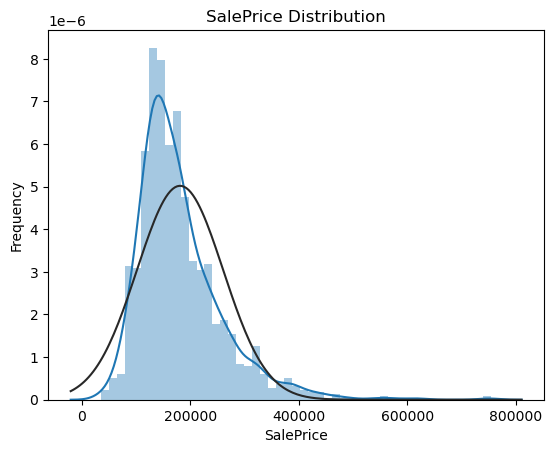

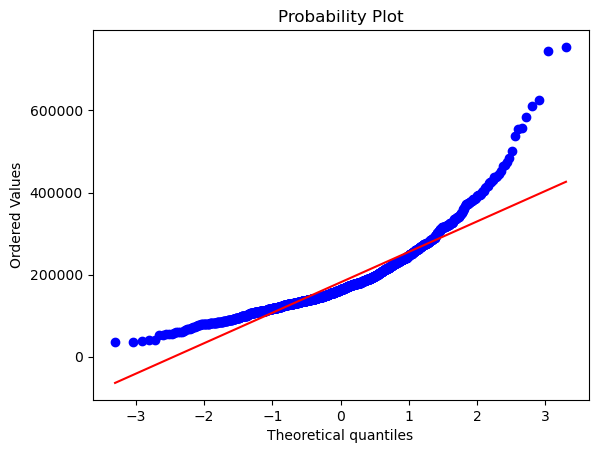

In [653]:
sns.distplot(train_df['SalePrice'], fit = norm)
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

In [654]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

/var/folders/1q/10wjgjpx4h5c_2sn3wst77f80000gn/T/ipykernel_1404/802759866.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['SalePrice'], fit = norm)


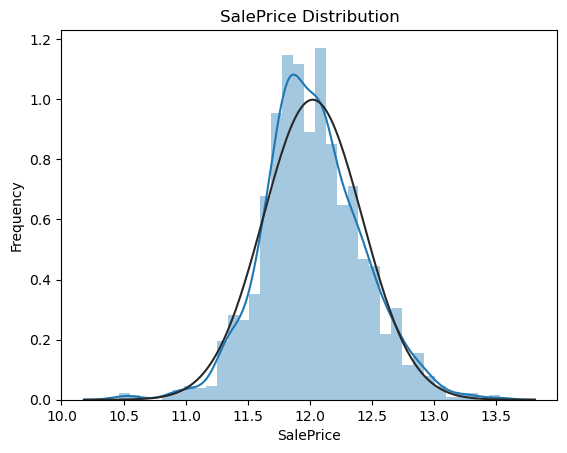

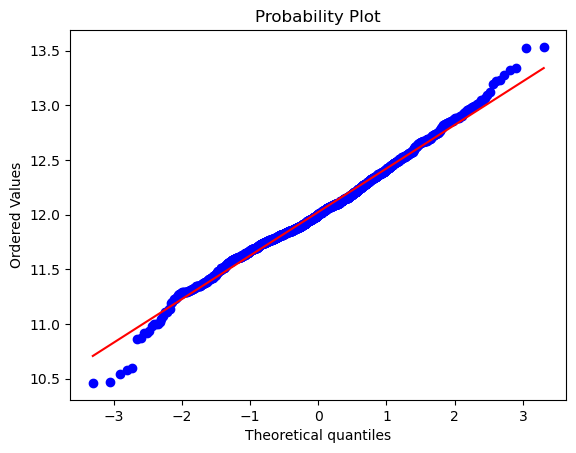

In [655]:
sns.distplot(train_df['SalePrice'], fit = norm)
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

/var/folders/1q/10wjgjpx4h5c_2sn3wst77f80000gn/T/ipykernel_1404/1700573671.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_df['GrLivArea'], fit = norm)


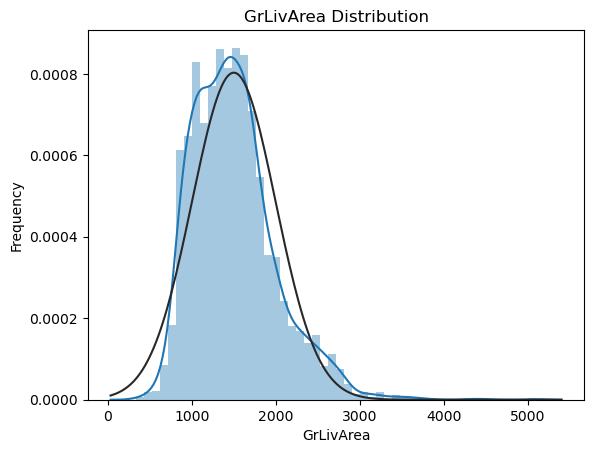

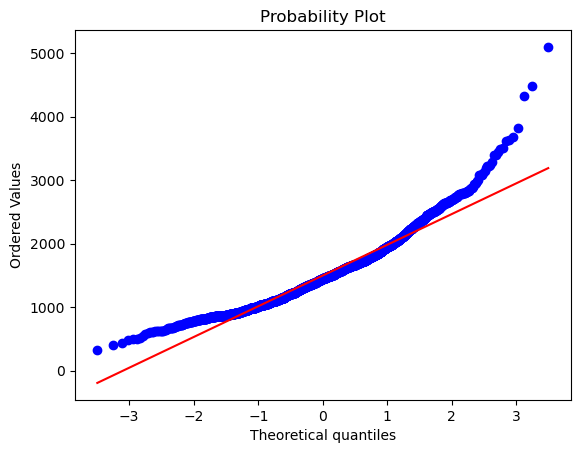

In [656]:
sns.distplot(all_df['GrLivArea'], fit = norm)
plt.ylabel('Frequency')
plt.title('GrLivArea Distribution')

fig = plt.figure()
res = stats.probplot(all_df['GrLivArea'], plot=plt)
plt.show()

/var/folders/1q/10wjgjpx4h5c_2sn3wst77f80000gn/T/ipykernel_1404/2423404924.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_df['GrLivArea'], fit = norm)


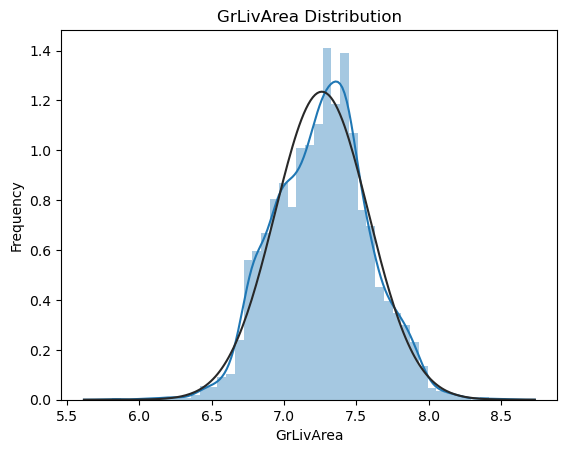

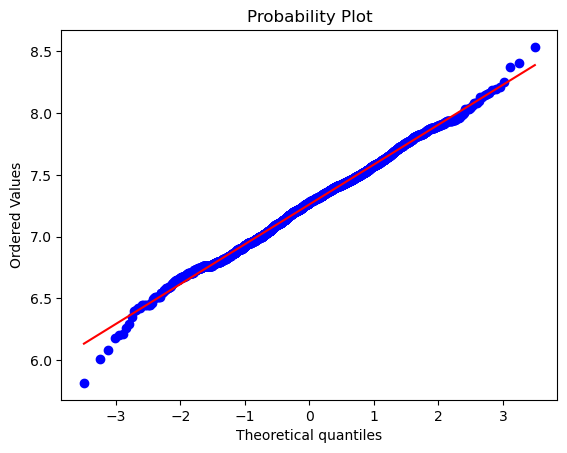

In [657]:
all_df['GrLivArea'] = np.log1p(all_df['GrLivArea'])
sns.distplot(all_df['GrLivArea'], fit = norm)
plt.ylabel('Frequency')
plt.title('GrLivArea Distribution')

fig = plt.figure()
res = stats.probplot(all_df['GrLivArea'], plot=plt)
plt.show()

/var/folders/1q/10wjgjpx4h5c_2sn3wst77f80000gn/T/ipykernel_1404/3278185869.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_df['TotalBsmtSF'], fit = norm)


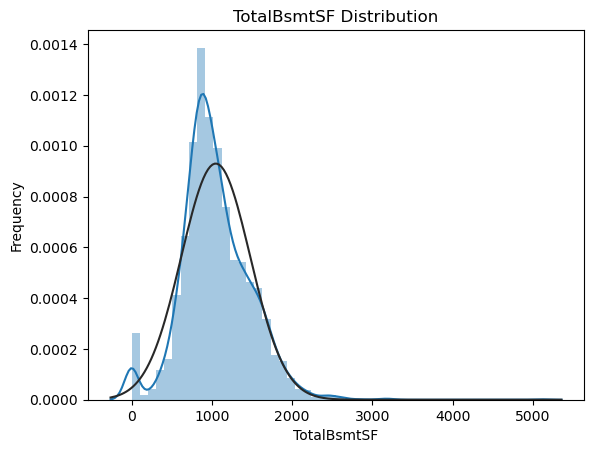

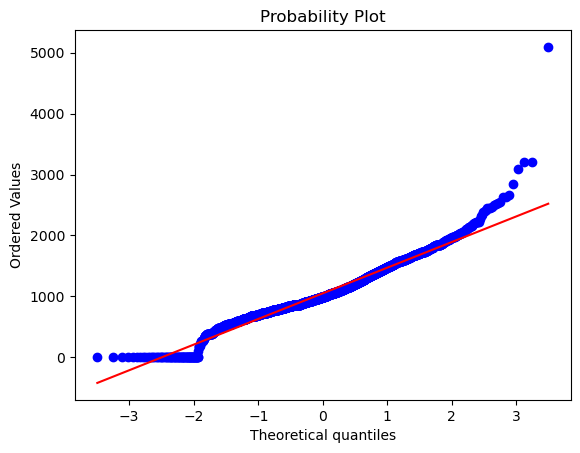

In [658]:
sns.distplot(all_df['TotalBsmtSF'], fit = norm)
plt.ylabel('Frequency')
plt.title('TotalBsmtSF Distribution')

fig = plt.figure()
res = stats.probplot(all_df['TotalBsmtSF'], plot=plt)
plt.show()

In [659]:
all_df['HasBsmt'] = pd.Series(len(all_df['TotalBsmtSF']),index=all_df)
all_df['HasBsmt'] = 0
all_df.loc[all_df['TotalBsmtSF']>0,'HasBsmt'] = 1
all_df.loc[all_df['HasBsmt']==1,'TotalBsmtSF'] = np.log1p(all_df['TotalBsmtSF'])

/var/folders/1q/10wjgjpx4h5c_2sn3wst77f80000gn/T/ipykernel_1404/3400320269.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_df[all_df['TotalBsmtSF']>0]['TotalBsmtSF'],fit=norm)


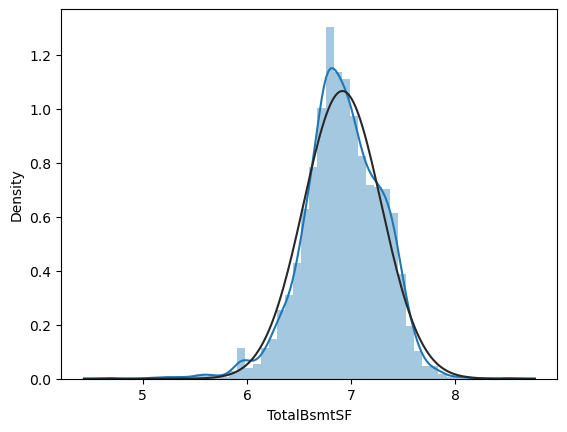

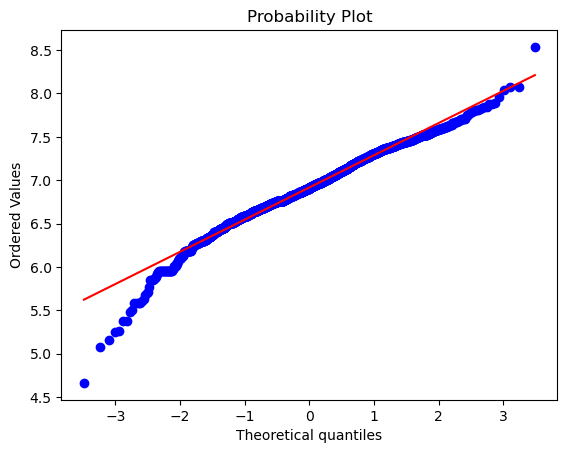

In [660]:
sns.distplot(all_df[all_df['TotalBsmtSF']>0]['TotalBsmtSF'],fit=norm)
fig = plt.figure()
res = stats.probplot(all_df[all_df['TotalBsmtSF']>0]['TotalBsmtSF'],plot=plt)
plt.show()

In [661]:
num_feature = all_df.dtypes[all_df.dtypes!='object'].index
skewed_feature = all_df[num_feature].apply(lambda x : skew(x)).sort_values(ascending = False)
print("\n Skewness in numeric feature\n")
Skewness = pd.DataFrame({'skewed_feature':skewed_feature})
Skewness


 Skewness in numeric feature



,skewed_feature
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [662]:
Skewness = Skewness[abs(Skewness)>0.75]
from scipy.special import boxcox1p
skewed_feature = Skewness.index
lam = 0.15
for var in skewed_feature:
    all_df[var] = boxcox1p(all_df[var], lam)

In [663]:
all_df = all_df.drop(['Id'], axis=1)

In [664]:
all_df.dtypes[all_df.dtypes=='object'].index

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [665]:
Ordered_feature = ('ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageFinish','GarageCond')

In [666]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in Ordered_feature:
    all_df[col] = le.fit_transform(all_df[col])

In [667]:
train_x = all_df.iloc[0:1458,:]
test_x = all_df.iloc[1458:,:]

In [668]:
test_x

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasBsmt
1458,20,RH,20.479373,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0.0,0.0,7.020909,0.0,0.000000,2.259674,14.198437,WD,Normal,0.730463
1459,20,RL,21.327220,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0.0,0.0,0.000000,0.0,20.777526,2.259674,14.198437,WD,Normal,0.730463
1460,60,RL,21.196905,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0.0,0.0,0.000000,0.0,0.000000,1.540963,14.198437,WD,Normal,0.730463
1461,60,RL,19.865444,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0.0,0.0,0.000000,0.0,0.000000,2.259674,14.198437,WD,Normal,0.730463
1462,120,RL,17.257255,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,0.0,0.0,7.397498,0.0,0.000000,0.730463,14.198437,WD,Normal,0.730463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,RM,14.081426,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0.0,0.0,0.000000,0.0,0.000000,2.259674,14.192207,WD,Normal,0.730463
2913,160,RM,14.013314,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0.0,0.0,0.000000,0.0,0.000000,1.820334,14.192207,WD,Abnorml,0.730463
2914,20,RL,22.782058,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0.0,0.0,0.000000,0.0,0.000000,2.750250,14.192207,WD,Abnorml,0.730463
2915,85,RL,20.046557,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0.0,0.0,0.000000,0.0,11.147538,2.440268,14.192207,WD,Normal,0.730463


In [669]:
train_y = train_df['SalePrice']
train_y = train_y.iloc[0:1458]
train_y.index = range(len(train_y))
train_y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1453    12.072547
1454    12.254868
1455    12.493133
1456    11.864469
1457    11.901590
Name: SalePrice, Length: 1458, dtype: float64

In [670]:
from category_encoders import LeaveOneOutEncoder
Cal = all_df.dtypes[all_df.dtypes == 'object'].index
for col in Cal:
    Loo = LeaveOneOutEncoder()
    Loo.fit(train_x[col],train_y)
    train_x[col] = Loo.transform(train_x[col])
    test_x[col] = Loo.transform(test_x[col])

/Users/yoshimasa/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/var/folders/1q/10wjgjpx4h5c_2sn3wst77f80000gn/T/ipykernel_1404/3603987429.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x[col] = Loo.transform(train_x[col])
/var/folders/1q/10wjgjpx4h5c_2sn3wst77f80000gn/T/ipykernel_1404/3603987429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [671]:
train_x.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasBsmt
0,12.341899,12.085945,19.212182,12.025489,11.936101,12.0227,12.024147,12.001787,12.020522,12.163647,...,0.000000,0.0,0.0,0.0,0.0,1.194318,14.195323,11.991068,12.005040,0.730463
1,12.052794,12.085945,19.712205,12.025489,11.936101,12.0227,12.024147,12.034748,12.020522,12.344180,...,0.000000,0.0,0.0,0.0,0.0,2.055642,14.193765,11.991068,12.005040,0.730463
2,12.341899,12.085945,20.347241,12.025489,12.163547,12.0227,12.024147,12.001787,12.020522,12.163647,...,0.000000,0.0,0.0,0.0,0.0,2.750250,14.195323,11.991068,12.005040,0.730463
3,11.964052,12.085945,19.691553,12.025489,12.163547,12.0227,12.024147,12.027622,12.020522,12.206664,...,8.797736,0.0,0.0,0.0,0.0,1.194318,14.192207,11.991068,11.788783,0.730463
4,12.341899,12.085945,21.325160,12.025489,12.163547,12.0227,12.024147,12.034748,12.020522,12.676003,...,0.000000,0.0,0.0,0.0,0.0,3.128239,14.195323,11.991068,12.005040,0.730463


In [672]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

In [698]:
pipe = make_pipeline(StandardScaler(), Lasso(max_iter=1e7))
para_gram = {'lasso__alpha':[0.0003,0.0004,0.0005]}
grid = GridSearchCV(pipe, para_gram, cv=5)
grid.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lasso', Lasso(max_iter=10000000.0))]),
             param_grid={'lasso__alpha': [0.0003, 0.0004, 0.0005]})

In [699]:
grid.best_params_

{'lasso__alpha': 0.0003}

In [700]:
grid.best_score_

0.9140571235589933

In [701]:
test_y = grid.predict(test_x)
test_y

array([11.59261914, 11.95086437, 12.11377498, ..., 12.06713787,
       11.68876712, 12.29394802])

In [702]:
test_y = np.expm1(test_y)
test_y

array([108294.52788576, 154950.02427651, 182365.73831178, ...,
       174055.95756004, 119223.92538439, 218369.40743594])

In [703]:
test = pd.concat((test_df['Id'],pd.DataFrame(test_y)),axis=1)
test.columns = ['Id','SalePrice']
test

,Id,SalePrice
0,1461,108294.527886
1,1462,154950.024277
2,1463,182365.738312
3,1464,199180.904792
4,1465,198480.961083
...,...,...
1454,2915,85386.315427
1455,2916,85504.469777
1456,2917,174055.957560
1457,2918,119223.925384


In [704]:
test.to_csv('/Users/yoshimasa/Downloads/house-prices-advanced-regression-techniques/subm.csv',index=False)